<a href="https://colab.research.google.com/github/nanabonsu92/Deep-Learning_TIES4911/blob/main/TIES4911_Task_2_1_(Bonsu_Afrane).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2-1**

Compare performance (loss, accuracy, and examples of predictions of trained model) of several implementations for MNIST dataset classification mentioned in the lecture materials: single-layer neural network and Multi-Layer Perceptron (MLP) (at least in TF2, but if you what, you may also try TF1 version as well). But this time, use Fashion-MNIST dataset instead. Play with training hyper-parameters (e.g. network architecture, learning rates, optimizers, etc.) and compare performance… Present comparison results in a table (including corresponding hyper-parameters settings).   

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading the MNIST data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [ ]:
# Single-Layer Neural Network Model
model_single_layer = Sequential([
    Dense(10, activation='softmax', input_shape=(28 * 28,))
])
model_single_layer.compile(optimizer=Adam(learning_rate=0.001),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
history_single_layer = model_single_layer.fit(train_images, train_labels,
                                              epochs=10,
                                              validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4698 - accuracy: 0.8755 - val_loss: 0.3080 - val_accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9148 - val_loss: 0.2809 - val_accuracy: 0.9208
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9207 - val_loss: 0.2775 - val_accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9239 - val_loss: 0.2722 - val_accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9254 - val_loss: 0.2705 - val_accuracy: 0.9236
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9272 - val_loss: 0.2659 - val_accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9279 - val_loss: 0.2633 - val_accuracy:

In [ ]:
model_single_layer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Multi-Layer Perceptron Model
model_mlp = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.3),  # Added dropout
    Dense(256, activation='relu'),
    Dropout(0.3),  # Added dropout
    Dense(10, activation='softmax')
])

model_mlp.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_mlp = model_mlp.fit(train_images, train_labels,
                            epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2449 - accuracy: 0.9256 - val_loss: 0.1197 - val_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1215 - accuracy: 0.9627 - val_loss: 0.0775 - val_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0973 - accuracy: 0.9701 - val_loss: 0.0749 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.0735 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.0654 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0594 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 0.0611 -

In [ ]:
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Function to print model performance
def print_performance(history, model_name):
    print(f"Performance of {model_name}:")
    print(f"Training Accuracy: {history.history['accuracy'][-1]}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print(f"Training Loss: {history.history['loss'][-1]}")
    print(f"Validation Loss: {history.history['val_loss'][-1]}\n")

# Print performance for Single-Layer Neural Network
print_performance(history_single_layer, 'Single-Layer Neural Network')

# Print performance for MLP
print_performance(history_mlp, 'Multi-Layer Perceptron')

Performance of Single-Layer Neural Network:
Training Accuracy: 0.9301333427429199
Validation Accuracy: 0.9257000088691711
Training Loss: 0.2511180341243744
Validation Loss: 0.2645651698112488

Performance of Multi-Layer Perceptron:
Training Accuracy: 0.9855333566665649
Validation Accuracy: 0.9848999977111816
Training Loss: 0.04708677530288696
Validation Loss: 0.06035025790333748



In [ ]:
# Function to plot the metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy - ' + title)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss - ' + title)
    plt.legend()
    plt.show()

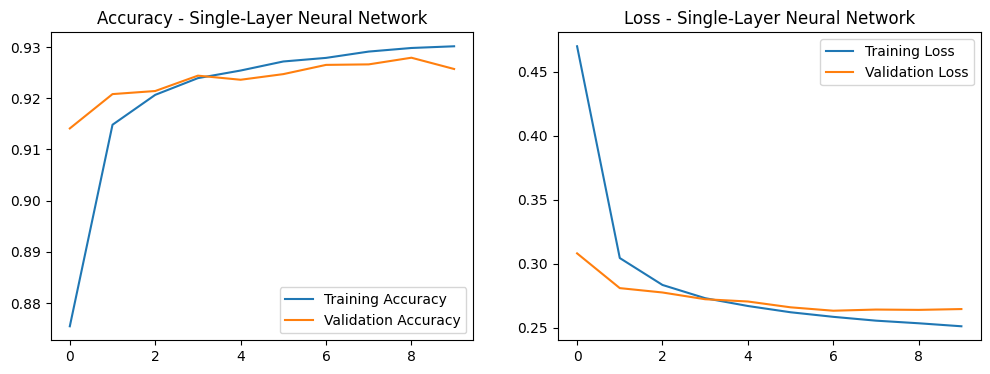

In [ ]:
# Plot metrics for Single-Layer Neural Network
plot_metrics(history_single_layer, 'Single-Layer Neural Network')

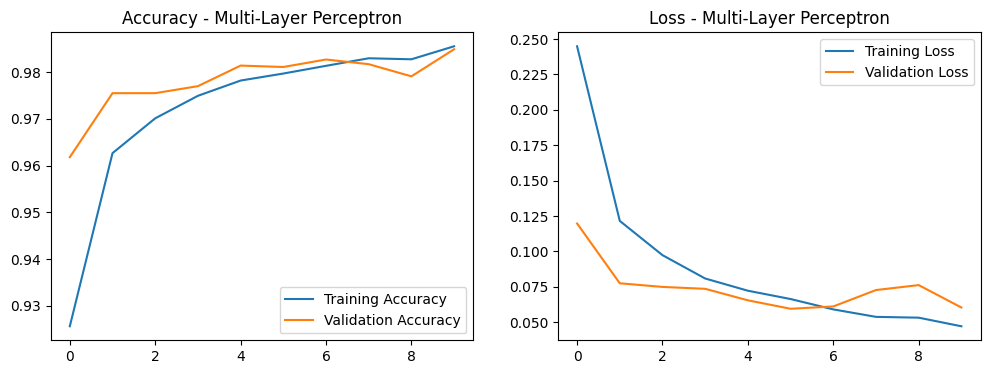

In [ ]:
# Plot metrics for MLP
plot_metrics(history_mlp, 'Multi-Layer Perceptron')

In [ ]:
# Function to display predictions
def display_predictions(model, title):
    predictions = model.predict(test_images[:10])
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title('Pred: {}'.format(np.argmax(predictions[i])))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

1/1 [==============================] - 0s 80ms/step


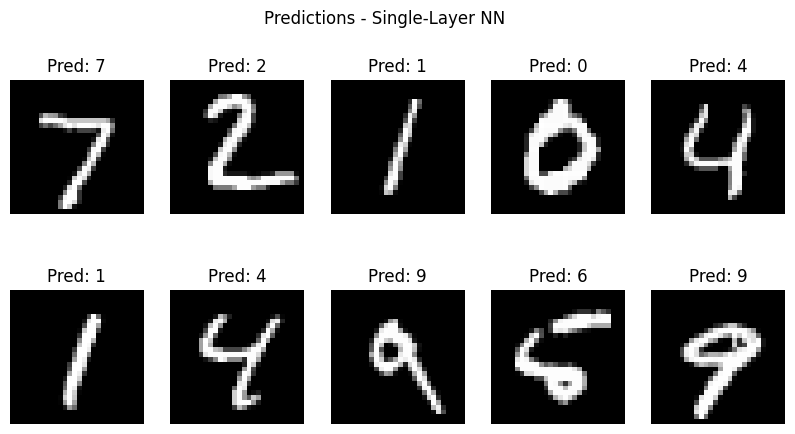

In [ ]:
# Display predictions for Single-Layer Neural Network
display_predictions(model_single_layer, 'Predictions - Single-Layer NN')

1/1 [==============================] - 0s 56ms/step


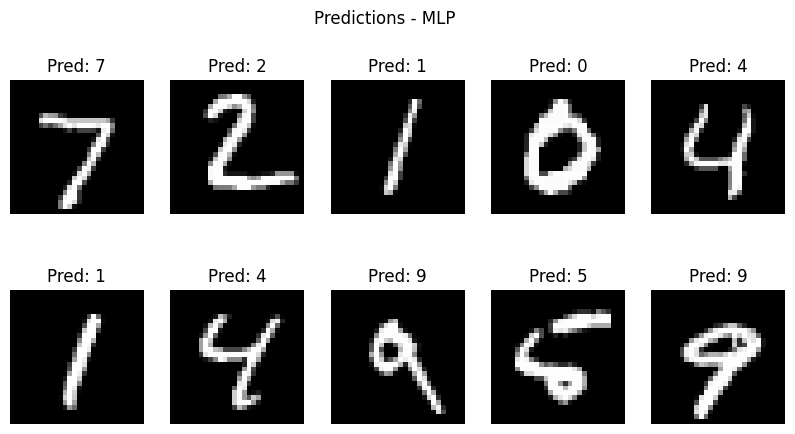

In [ ]:
# Display predictions for MLP
display_predictions(model_mlp, 'Predictions - MLP')

|Model Type| Model | No. of layers | Parameters |optimizer|epochs| Activation|Learning rate| Training Loss | Training Accuracy |
|----|------|--------------|----------|-------|------|-------|-------|------|-----|
|Single_Layer_NN|sequential| 1 |Dense(10) |SGD|10|Softmax|0.01|0.32118529081344604|0.9101166725158691|
|Single_Layer_NN|sequential| 1 |Dense(128) |Adam|10|Softmax|0.05|0.9937243461608887|0.8984166383743286|
|Single_Layer_NN|sequential| 1 |Dense(10) |Adam|10|Softmax|0.001|0.2507101893424988|0.9309333562850952|
|Multi_Layer_Perceptron|sequential| 3 |Dense(512),Dense(256), Dense(10) |Adam|10|ReLu, ReLu, Softmax|0.001|0.015014520846307278|0.994949996471405|
|Multi_Layer_Perceptron|sequential| 2 |Dense(256), Dense(10) |Adam|10|ReLu, Softmax|0.01|0.09626539051532745|0.9785500168800354|
|Multi_Layer_Perceptron|sequential| 5 |Dense(512), Dropout(0.3),Dense(256),Dropout(0.3), Dense(10) |Adam|20|ReLu, ReLu, Softmax|0.001|0.04887370020151138|0.9843500256538391|

